# Introduction

Nama : Ali Abdurrahman

Batch : HCK - 030

Dataset : Telco Customer Churn

Pada proyek kali ini, kita akan menganalisa tentang churn. Churn adalah istilah di bisnis untuk menggambarkan pelanggan yang berhenti menggunakan layanan atau berhenti berlangganan dalam periode tertentu. Pada dataset kali ini kita akan mencoba memprediksi pelanggan mana yang berpotensi churn dan tidak.

**Latar Belakang**

Perusahaan ini bergerak di industri **layanan telekomunikasi** yang kompetitif, di mana **retensi pelanggan** menjadi salah satu kunci keberhasilan jangka panjang.  
Salah satu tantangan utama yang dihadapi adalah **churn**, yaitu ketika pelanggan berhenti berlangganan dan beralih ke penyedia lain.

**Churn** dilacak karena **mempertahankan pelanggan yang sudah ada** umumnya lebih hemat biaya dibandingkan mencari pelanggan baru.  
Kehilangan pelanggan berarti **kehilangan pendapatan** dan berpotensi **meningkatkan biaya akuisisi**.  
Dengan memahami siapa saja pelanggan yang berisiko churn, perusahaan dapat mengambil langkah pencegahan, seperti memberikan penawaran khusus atau meningkatkan kualitas layanan.

---

Dalam analisis ini, **Recall** dipilih sebagai **metrik utama** untuk mengevaluasi model prediksi churn.  
**Recall** mengukur seberapa banyak pelanggan yang **benar-benar akan churn** dapat terdeteksi oleh model.

Fokus pada **Recall** penting karena kegagalan mendeteksi pelanggan yang akan churn (*false negative*) berarti **perusahaan kehilangan kesempatan** untuk melakukan intervensi dan **mempertahankan mereka**.

---

Pendekatan ini mendukung **strategi bisnis** yang memprioritaskan **pencegahan churn**:  
lebih baik memberikan **upaya retensi** pada pelanggan yang terdeteksi berisiko, meskipun sebagian dari mereka mungkin tetap bertahan, daripada **tidak mendeteksi pelanggan** yang benar-benar akan pergi.

**User**: **Tim Manajemen** dan **Marketing**


# Import Libraries

Kita Import terlebih dahulu library yang kita perlukan di program ini

In [1]:
# =========================
# Data & Utilitas
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Pemilihan Model & Cross-Validation
# =========================
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
)

# =========================
# Prapemrosesan (Encoding & Scaling)
# =========================
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# =========================
# Pipeline
# =========================
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # pipeline dengan langkah oversampling

# =========================
# Model Klasifikasi
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# =========================
# Penanganan Imbalanced
# =========================
from imblearn.over_sampling import SMOTE

# =========================
# Metrik & Visualisasi
# =========================
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    recall_score,
)


# Data Loading

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # Membaca dataset

In [3]:
df #melihat dataframe full

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
import pandas as pd

# Supaya nilai unik tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)

# Ambil semua kolom (numerik, kategori, dll)
all_cols = df.columns

# Simpan hasil
listCols = []
for col in all_cols:
    unique_vals = df[col].unique()
    listCols.append([
        col,                 # nama kolom
        df[col].nunique(),   # jumlah nilai unik
        unique_vals          # daftar nilai unik
    ])

# Buat DataFrame ringkasan
cardinality_df = pd.DataFrame(
    columns=['Features', 'Sum of Unique Value', 'Unique Value'],
    data=listCols
)

# Tampilkan
cardinality_df


,Features,Sum of Unique Value,Unique Value
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"


In [5]:
df.info() # cek tipe data asli dataset untuk memperkirakan mana yang perlu diubah tipe datanya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum() #cek apakah terdapat missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts() #melihat jumlah churn dan tidak churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64

| Kolom            | Deskripsi |
|------------------|-----------|
| `customerID`     | Customer ID (unique identifier untuk tiap pelanggan) |
| `gender`         | Jenis kelamin pelanggan (Male / Female) |
| `SeniorCitizen`  | Apakah pelanggan adalah warga lansia (1: ya, 0: tidak) |
| `Partner`        | Apakah pelanggan memiliki pasangan (Yes / No) |
| `Dependents`     | Apakah pelanggan memiliki tanggungan seperti anak atau keluarga (Yes / No) |
| `tenure`         | Jumlah bulan pelanggan telah berlangganan di perusahaan |
| `PhoneService`   | Apakah pelanggan memiliki layanan telepon (Yes / No) |
| `MultipleLines`  | Apakah pelanggan memiliki lebih dari satu line telepon (Yes / No / No phone service) |
| `InternetService`| Jenis layanan internet pelanggan (DSL / Fiber optic / No) |
| `OnlineSecurity` | Apakah pelanggan memiliki layanan keamanan online (Yes / No / No internet service) |
| `OnlineBackup`   | Apakah pelanggan memiliki layanan backup online (Yes / No / No internet service) |
| `DeviceProtection` | Apakah pelanggan memiliki proteksi perangkat (Yes / No / No internet service) |
| `TechSupport`    | Apakah pelanggan memiliki dukungan teknis (Yes / No / No internet service) |
| `StreamingTV`    | Apakah pelanggan memiliki layanan streaming TV (Yes / No / No internet service) |
| `StreamingMovies`| Apakah pelanggan memiliki layanan streaming film (Yes / No / No internet service) |
| `Contract`       | Jenis kontrak pelanggan (Month-to-month / One year / Two year) |
| `PaperlessBilling`| Apakah pelanggan menggunakan sistem tagihan tanpa kertas (Yes / No) |
| `PaymentMethod`  | Metode pembayaran pelanggan (Electronic check / Mailed check / Bank transfer / Credit card) |
| `MonthlyCharges` | Jumlah biaya bulanan pelanggan |
| `TotalCharges`   | Total biaya yang dibebankan kepada pelanggan |
| `Churn`          | Apakah pelanggan berhenti berlangganan (Yes / No) |


# EDA

## Hubungan kolom Contract dengan Churn

In [8]:
df['Contract'] #melihat kolom Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

Kita akan mencari hubungan kolom Contract dengan churn. Karena kolom Contract berisi 3 jenis data ordinal (Month-to-month, One Year, Two Year). Untuk meyakinkan bahwa kolom Contract adalah tipe data ordinal, maka kita harus clear-kan dulu apakah antara 3 isi kolom berlevel tersebut terdapat pola hierarki atau tidak.

In [9]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() #melihat proporsi churn berdasarkan jenis kontrak

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


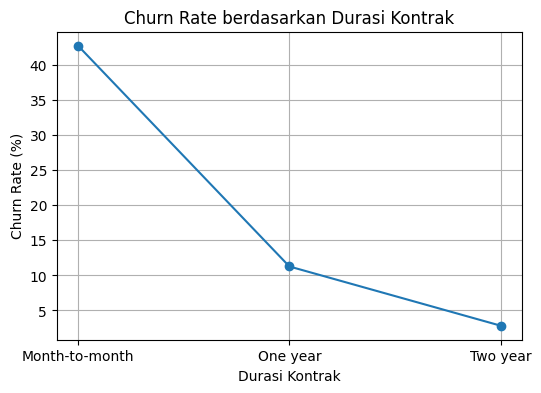

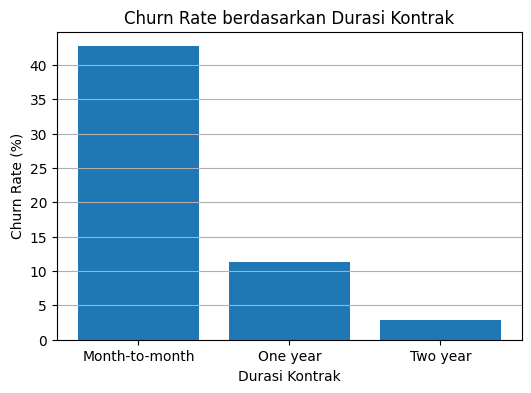

In [10]:
# Hitung churn rate untuk setiap jenis durasi kontrak (dalam persentase)
churn_rate = (
    df.groupby("Contract")["Churn"]
      .apply(lambda s: (s == "Yes").mean() * 100)
)

# Mengatur urutan label kontrak agar konsisten
order = ["Month-to-month", "One year", "Two year"]
churn_rate = churn_rate[order]

# Membuat grafik garis churn rate berdasarkan durasi kontrak
plt.figure(figsize=(6,4))
plt.plot(churn_rate.index, churn_rate.values, marker="o", linestyle="-")
plt.title("Churn Rate berdasarkan Durasi Kontrak")
plt.xlabel("Durasi Kontrak")
plt.ylabel("Churn Rate (%)")
plt.grid(True)
plt.show()

# Membuat grafik batang churn rate berdasarkan durasi kontrak
plt.figure(figsize=(6,4))
plt.bar(churn_rate.index, churn_rate.values)
plt.title("Churn Rate berdasarkan Durasi Kontrak")
plt.xlabel("Durasi Kontrak")
plt.ylabel("Churn Rate (%)")
plt.grid(axis="y")
plt.show()

### Visualisasi Tren Monotonic Durasi Kontrak terhadap Churn Rate

Berdasarkan data, churn rate menurun secara konsisten dari **Month-to-month** → **One year** → **Two year**.  
Hal ini menunjukkan bahwa semakin panjang durasi kontrak, semakin kecil kemungkinan pelanggan melakukan churn.  

Dengan kata lain, variabel `Contract` dapat diperlakukan sebagai **ordinal** karena:
1. Kategorinya memiliki urutan logis (berdasarkan durasi kontrak).
2. Nilainya menunjukkan tren **monotonic** terhadap target `Churn`.  
   *(Monotonic: nilai berubah secara konsisten dalam satu arah —> terus naik atau terus turun —> seiring perubahan variabel lain).*

---

### Pola Hubungan Durasi Kontrak dan Churn Rate

Berdasarkan analisis, ditemukan pola sebagai berikut:

- **Month-to-month** → churn rate tertinggi (**42.7%**) - level 1
- **One year** → churn rate jauh lebih rendah (**11.3%**) - level 2
- **Two year** → churn rate paling rendah (**2.8%**) - level 3

---

### Interpretasi

Pola ini konsisten **menurun** seiring bertambahnya lama kontrak.  
Artinya, semakin panjang kontrak, semakin kecil kemungkinan pelanggan melakukan churn.

Dengan kata lain, kolom `Contract` dapat dianggap sebagai **data ordinal**, karena:

1. Kategorinya memiliki urutan logis (berdasarkan durasi kontrak).
2. Nilainya menunjukkan tren **monotonic** terhadap target `Churn`.  


---


In [11]:
df.groupby('Contract')['MonthlyCharges'].mean() #urutkan berdasarkan rata-rata biaya bulanan


Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

## Distribusi Target (Churn)

C:\Users\Ali\AppData\Local\Temp\ipykernel_11504\2680990923.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


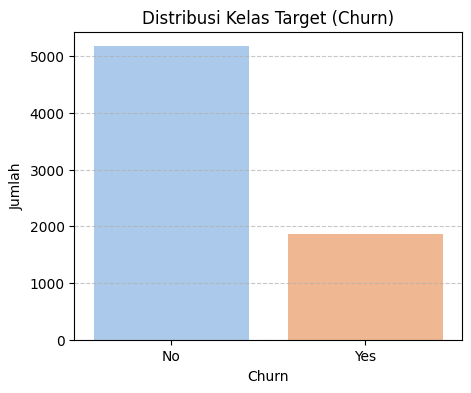

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [12]:
# --- 0) Import & Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Tambahan untuk visualisasi

# Tampilkan semua kolom saat print dataframe
pd.set_option('display.max_columns', None)

# --- 1) Distribusi Target (Churn) ---
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribusi Kelas Target (Churn)')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Persentase tiap kelas
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(churn_percentage)


**Distribusi Target (Churn)**

- **Tujuan**: Menampilkan jumlah dan persentase pelanggan yang melakukan *churn* (`Yes`) vs yang tidak (`No`).
- **Insight**: Distribusi ini memperlihatkan apakah dataset **imbalanced** atau seimbang.
- **Relevansi Bisnis**:
  - Jika *imbalanced*, model cenderung bias ke kelas mayoritas.
  - Menjadi dasar penggunaan **SMOTE** untuk meningkatkan *recall* pada kelas positif (`Yes`).
- **Hasil pada Dataset Ini**:
  - Kelas `No` jauh lebih banyak daripada `Yes`.
  - Mengindikasikan risiko *false negative* tinggi jika model tidak ditangani khusus.


# Feature Engineering

**Konversi Kolom `TotalCharges` Menjadi Numerik**

Pada dataset Telco Customer Churn, kolom `TotalCharges` seharusnya berisi angka yang merepresentasikan total tagihan pelanggan sejak awal kontrak.  
Namun, hasil pengecekan awal menunjukkan bahwa kolom ini terbaca sebagai tipe **object** karena terdapat nilai non-angka, seperti **string kosong** (`" "`), khususnya pada pelanggan baru.

Alasan Konversi
1. **Kebutuhan untuk Analisis dan Modeling**
   - Model machine learning dan perhitungan statistik memerlukan nilai numerik, bukan string.
2. **Konsistensi Tipe Data**
   - Nilai non-angka seperti string kosong membuat seluruh kolom terbaca sebagai object, sehingga fungsi statistik tidak dapat dijalankan.
3. **Penanganan Missing Value**
   - Dengan `pd.to_numeric(..., errors='coerce')`, nilai string kosong atau non-angka akan dikonversi menjadi `NaN` sehingga bisa ditangani (imputasi/drop/fillna).

**Bukti Adanya String Kosong**

Untuk membuktikan bahwa kolom `TotalCharges` memiliki nilai string kosong dan berupa tipe data object (bukan numerik, sedangkan kita memerlukannya sebagai numerik) sebelum dikonversi:

In [13]:
#cek baris yang memiliki TotalCharges kosong (string kosong)
df[df['TotalCharges'].str.strip() == ''][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,
753,3115-CZMZD,0,20.25,
936,5709-LVOEQ,0,80.85,
1082,4367-NUYAO,0,25.75,
1340,1371-DWPAZ,0,56.05,
3331,7644-OMVMY,0,19.85,
3826,3213-VVOLG,0,25.35,
4380,2520-SGTTA,0,20.00,
5218,2923-ARZLG,0,19.70,
6670,4075-WKNIU,0,73.35,


In [14]:
print(df['TotalCharges'].dtype)

object


Di atas sudah terbukti bahwa Total Charges terdapat string kosong dan masih berupa tipe data object. Maka karena itu, kita akan mengubahnya menjadi kolom bertipe data numerik sesuai kebutuhan

In [15]:
# Ubah TotalCharges jadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.info() #cek kembali apakah TotalCharges sudah berubah menjadi numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Handling Cardinality

In [17]:
# Mengatur tampilan pandas agar kolom tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)

# Mengambil daftar kolom bertipe object (kategori)
cat_cols = list(df.select_dtypes(include='object').columns)

# Menyimpan informasi cardinality setiap kolom kategori
listCols = []
for col in cat_cols:
    # Simpan nama kolom, jumlah nilai unik, dan daftar nilai uniknya
    listCols.append([col, df[col].nunique(), df[col].unique()])

# Membuat DataFrame ringkasan jumlah nilai unik dan nilai uniknya per kolom
pd.DataFrame(columns=['Features', 'Sum of Unique Value', 'Unique Value'], data=listCols)


,Features,Sum of Unique Value,Unique Value
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,2,"[Female, Male]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,PhoneService,2,"[No, Yes]"
5,MultipleLines,3,"[No phone service, No, Yes]"
6,InternetService,3,"[DSL, Fiber optic, No]"
7,OnlineSecurity,3,"[No, Yes, No internet service]"
8,OnlineBackup,3,"[Yes, No, No internet service]"
9,DeviceProtection,3,"[No, Yes, No internet service]"


In [18]:
df.drop('customerID', axis=1, inplace=True) #hapus kolom customerID

**Alasan Menghapus Kolom `customerID`**

1. **Tidak Memiliki Hubungan Kausal dengan Target**  
   `customerID` hanya berfungsi sebagai identifier unik dan tidak mempengaruhi perilaku pelanggan (churn atau tidak). Nilainya tidak memiliki hubungan kausal maupun korelatif dengan variabel target.

2. **High Cardinality Categorical Feature**  
   `customerID` memiliki jumlah kategori sama dengan jumlah baris (unik untuk setiap pelanggan). Jika digunakan sebagai fitur, akan menambah kompleksitas model, berisiko menyebabkan overfitting, dan membebani memori tanpa memberi manfaat prediktif.


In [19]:
# Cek kembali cardinality keseluruhan kolom
# Membuat list untuk simpan hasil
list_col = []

for col in df:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    list_col.append({
        'feature': col,
        'Jumlah Nilai yang unik': n_unique,
        'unique_values': unique_vals
    })

# Ubah jadi DataFrame
cat = pd.DataFrame(list_col)

# Tampilkan
pd.set_option('display.max_colwidth', None)  # agar nilai tidak terpotong
display(cat)

,feature,Jumlah Nilai yang unik,unique_values
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[0, 1]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
5,PhoneService,2,"[No, Yes]"
6,MultipleLines,3,"[No phone service, No, Yes]"
7,InternetService,3,"[DSL, Fiber optic, No]"
8,OnlineSecurity,3,"[No, Yes, No internet service]"
9,OnlineBackup,3,"[Yes, No, No internet service]"


Di atas kita sudah melihat cardinality, dan hanya kolom customerID yang cardinality nya tinggi. Selebihnya kita gunakan dalam proses modeling (kecuali Churn, karena akan dijadikan y target)

## Split X dan Y

Kita akan memisahkan kolom target (y) sebagai kolom yang akan diprediksi nanti. Dan menjadikan X sebagai kolom-kolom fitur.

In [20]:
# Ambil hanya kolom yang dibutuhkan
y = df['Churn']
X = df.drop('Churn', axis=1)

X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


## Split X dan y menjadi train dan test

Data dibagi menjadi train set untuk melatih model dan test set untuk mengevaluasi kinerjanya pada data baru, sehingga mengukur kemampuan generalisasi dan mencegah overfitting.

In [21]:
# Memisahkan data menjadi set pelatihan (train) dan pengujian (test)
# test_size=0.2 berarti 20% data digunakan untuk testing, sisanya 80% untuk training
# random_state=42 digunakan agar pembagian data konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Menampilkan bentuk (jumlah baris dan kolom) dari masing-masing set
print(X_train.shape)  # Ukuran data training (fitur)
print(X_test.shape)   # Ukuran data testing (fitur)
print(y_train.shape)  # Ukuran target training
print(y_test.shape)   # Ukuran target testing


(5634, 19)
(1409, 19)
(5634,)
(1409,)


In [22]:
# Mengecek nama kolom di train dan test
print(X_train.columns)
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


## Handling Missing Values

Kita cek hasil missing values, apakah berpola atau tidak. Karena, untuk menanganinya, kita perlu mengetahui hubungan missing values dengan kolom lain

In [23]:
X_train[X_train['TotalCharges'].isna()] # Cek baris TotalCharges yang memiliki nilai kosong (NaN)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN


In [24]:
X_train.isnull().sum() # Cek total missing values di X_train

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [25]:
X_train['TotalCharges'].isna().sum() #cek jumlah missing values di TotalCharges yang sudah di lihat diatas


10

Bisa dilihat diatas, terutama pada kode bagian `X_train[X_train['TotalCharges'].isna()]`, 

Bahwa missing values di kolom TotalCharges berhubungan dengan Tenure. Dan semua tenure yang berkaitan menghasilkan nilai nol. Ini bisa disimpulkan, bahwa missing values yang ada di kolom TotalCharges terjadi karena mereka adalah pelanggan baru, otomatis belum ada catatan pembayaran sama sekali.

Hasil yang telah dipisah agar mudah dilihat:

In [26]:
# Membuat mask (filter) untuk mencari pelanggan dengan tenure = 0
mask_tenure0 = X_train['tenure'] == 0

# Membuat mask untuk mencari baris dengan TotalCharges yang bernilai NaN
mask_nan = X_train['TotalCharges'].isna()

# Menampilkan jumlah pelanggan dengan tenure = 0
print("Tenure 0 total   :", mask_tenure0.sum())

# Menampilkan jumlah pelanggan tenure = 0 dan TotalCharges NaN
print("Tenure 0 & NaN   :", (mask_tenure0 & mask_nan).sum())

# Menampilkan jumlah pelanggan tenure = 0 dan TotalCharges tidak NaN
print("Tenure 0 & non-NaN:", (mask_tenure0 & ~mask_nan).sum())


Tenure 0 total   : 10
Tenure 0 & NaN   : 10
Tenure 0 & non-NaN: 0


Diatas adalah bukti, bahwa hubungan NaN (missing values) dan Tenure hanya terjadi di bagian Tenure yang 0. Seperti yang kita tahu, tenure itu menunjukkan lamanya berlangganan, sedangkan tenure yang terlacak hanya di bagian 0.

Itu berarti, dugaan bahwa missing values (NaN) adalah pelanggan yang baru berlangganan, adalah valid. Karena semua terjadi di tenure 0 (bulan pertama)

Jika sudah lihat hubungannya. Maka kita bisa menarik kesimpulan bahwa Ini termasuk **Missing Not At Random (MNAR)**, karena hilangnya nilai berhubungan langsung dengan variabel lain (tenure).

In [27]:
# Lihat beberapa sampel tenure 0
X_train[mask_tenure0][['tenure','MonthlyCharges','TotalCharges']].head(20)


,tenure,MonthlyCharges,TotalCharges
6754,0,61.90,NaN
1340,0,56.05,NaN
3826,0,25.35,NaN
5218,0,19.70,NaN
3331,0,19.85,NaN
936,0,80.85,NaN
753,0,20.25,NaN
4380,0,20.00,NaN
488,0,52.55,NaN
1082,0,25.75,NaN


Di atas kita melihat, bahwa TotalCharges yang sudah kita ketahui bahwa itu pelanggan baru yang belum membayar, tetapi, kenapa MonthlyCharges nya malah ada nilainya ? 

Berikut penjelasannya:

### Perbedaan `MonthlyCharges` dan `TotalCharges`

- **MonthlyCharges** → biaya langganan bulanan pelanggan saat ini.  
  Nilainya ada walaupun pelanggan baru saja mendaftar.  
  *(misalnya paket internet 80.85 per bulan)*

- **TotalCharges** → akumulasi total biaya yang sudah ditagihkan/dibayar sejak awal kontrak.  
  Jika pelanggan baru (`tenure = 0`), tagihan totalnya belum pernah dibayar atau dicatat → **makanya NaN**.

---

### NaN pada `TotalCharges` tidak berarti harga bulanan = 0

NaN artinya belum ada total akumulasi karena **belum melewati bulan pertama**.

Secara bisnis, ini adalah **pelanggan yang baru mendaftar**.

---

### Penanganan Missing Value

Karena missing value (`NaN`) terjadi karena pelanggan masih termasuk pelanggan baru,  
artinya total tagihan adalah 0. Dan langkahnya yang tepat untuk mengisi missing values dengan 0 (sesuai total harganya)


In [28]:
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(0) # Imputasi missing values (pelanggan baru) dengan 0

In [29]:
X_train[(X_train['TotalCharges'] == 0) & (X_train['tenure'] == 0)] # cek TotalCharges yang sudah menjadi 0, yang berhubungan dengan tenure = 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0


In [30]:
X_train[X_train['TotalCharges'] == 0] # Cek pelanggan baru yang memiliki TotalCharges 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0


In [31]:
X_train.isnull().sum() #cek kembali apakah missing values sudah terisi

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Di atas kita sudah eksplorasi dan imputasi missing values di X_train

Kita juga melakukan hal yang sama di X_test

In [32]:
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(0) # Imputasi missing values (pelanggan baru) dengan 0

In [33]:
X_test.isnull().sum() #cek kembali apakah missing values sudah terisi

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Handling Outlier

In [34]:
df.info() #cek tipe data yang numerik apa saja

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Kita akan cek persebaran datanya menggunakan boxplot, apakah ada data yang ekstrem ?

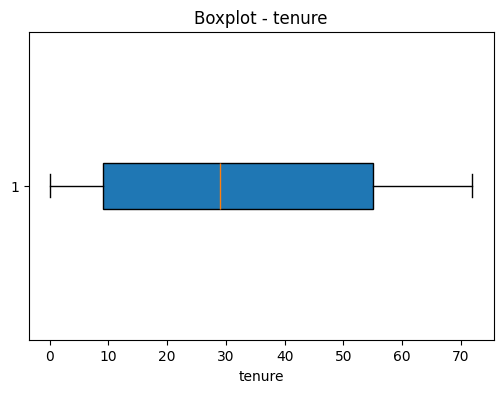

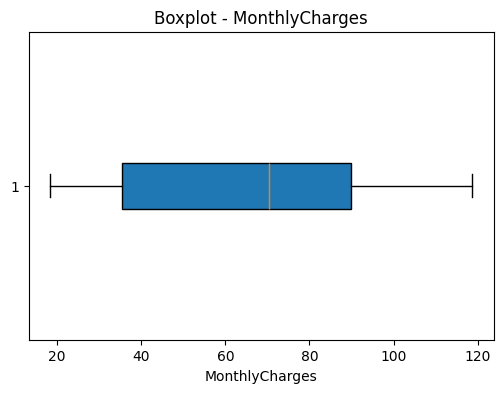

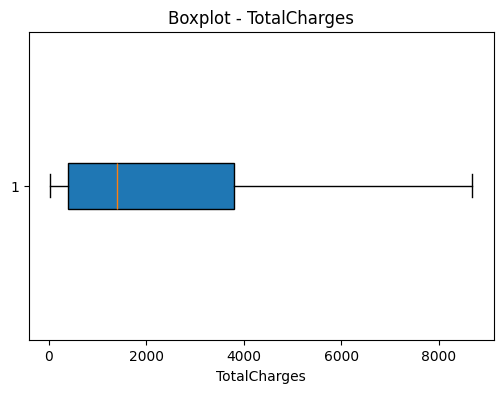

In [35]:
# Boxplot
# Menentukan daftar kolom numerik yang akan divisualisasikan
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Membuat boxplot untuk setiap kolom numerik
for col in num_cols:
    # Membuat figure dengan ukuran tertentu
    plt.figure(figsize=(6, 4))
    
    # Membuat boxplot horizontal dan mengabaikan nilai NaN
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True)
    
    # Menambahkan judul dan label sumbu
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    
    # Menampilkan plot
    plt.show()


Setelah itu, kita akan melihat histogram tenure dan MonthlyCharges. Kita bertujuan melihat range dan frekuensinya wajar atau tidak.

Berdasarkan hasil visualisasi boxplot dan histogram pada tiga fitur numerik utama:

- **`tenure`** memiliki rentang 0–72 bulan (6 tahun), yang sesuai dengan batas lama kontrak dan masuk akal secara bisnis.
- **`MonthlyCharges`** berada pada kisaran ±20–120, wajar untuk variasi tarif paket telekomunikasi mulai dari paket dasar hingga premium.
- **`TotalCharges`** proporsional terhadap `tenure × MonthlyCharges`, di mana nilai tinggi mencerminkan pelanggan dengan lama berlangganan besar dan tarif bulanan tinggi, sehingga bukan merupakan kesalahan data.

### Pembuktian Kewajaran Nilai Kolom TotalCharges, Sehingga tidak perlu di handling outlier

10 Pelanggan dengan TotalCharges Tertinggi:
      tenure  MonthlyCharges  TotalCharges  estimated_total
4610      72          117.80       8684.80          8481.60
4586      72          118.75       8672.45          8550.00
6768      72          117.50       8670.10          8460.00
5347      72          116.95       8594.40          8420.40
2187      71          116.25       8564.75          8253.75
6118      72          118.20       8547.15          8510.40
5558      72          116.40       8543.25          8380.80
2368      72          117.15       8529.50          8434.80
2603      72          114.90       8496.70          8272.80
2025      72          116.85       8477.70          8413.20


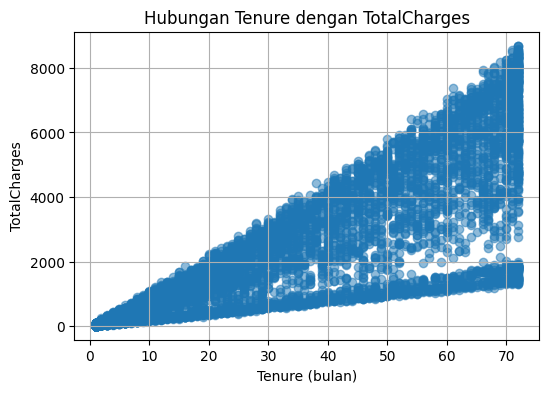

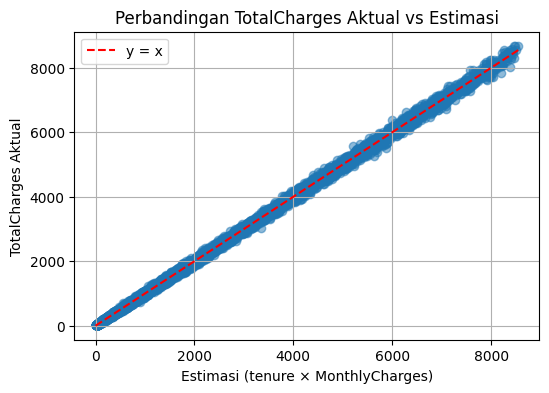

In [36]:
# === Hitung estimasi total tagihan TANPA menambah kolom di df asli ===
estimated_total = df['tenure'] * df['MonthlyCharges']

# === Bandingkan nilai aktual dan estimasi (buat dataframe sementara) ===
comparison = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
comparison['estimated_total'] = estimated_total
comparison = comparison.sort_values(by='TotalCharges', ascending=False)

# === Tampilkan 10 pelanggan dengan TotalCharges tertinggi ===
print("10 Pelanggan dengan TotalCharges Tertinggi:")
print(comparison.head(10))

# === Scatter plot: TotalCharges vs tenure ===
plt.figure(figsize=(6,4))
plt.scatter(df['tenure'], df['TotalCharges'], alpha=0.5, label='TotalCharges')
plt.xlabel('Tenure (bulan)')
plt.ylabel('TotalCharges')
plt.title('Hubungan Tenure dengan TotalCharges')
plt.grid(True)
plt.show()

# === Scatter plot: TotalCharges vs estimated_total ===
plt.figure(figsize=(6,4))
plt.scatter(estimated_total, df['TotalCharges'], alpha=0.5)
plt.plot([0, estimated_total.max()], [0, estimated_total.max()], 
         color='red', linestyle='--', label='y = x')
plt.xlabel('Estimasi (tenure × MonthlyCharges)')
plt.ylabel('TotalCharges Aktual')
plt.title('Perbandingan TotalCharges Aktual vs Estimasi')
plt.legend()
plt.grid(True)
plt.show()




Berdasarkan analisis terhadap pelanggan dengan nilai `TotalCharges` tertinggi, ditemukan bahwa:

1. **Tabel Perbandingan**  
   Pelanggan dengan `TotalCharges` terbesar adalah mereka yang memiliki `tenure` panjang dan `MonthlyCharges` tinggi.  
   Hal ini menunjukkan bahwa nilai total tagihan selaras dengan lama berlangganan dan tarif bulanan.

2. **Scatter Plot: Tenure vs TotalCharges**  
   Visualisasi menunjukkan pola tren menaik: semakin lama pelanggan berlangganan (`tenure` tinggi), semakin besar total tagihannya (`TotalCharges`).  
   Tidak ada titik ekstrem yang menyimpang jauh dari pola ini.

3. **Scatter Plot: Estimasi vs Aktual**  
   Perbandingan antara estimasi (`tenure × MonthlyCharges`) dan nilai aktual `TotalCharges` menunjukkan titik data yang mengikuti garis acuan `y = x`.  
   Pola ini membuktikan bahwa pencatatan `TotalCharges` konsisten dengan logika bisnis dan tidak ditemukan nilai yang tidak wajar.

**Kesimpulan:**  
Nilai-nilai tinggi pada `TotalCharges` adalah wajar secara bisnis, dihasilkan oleh pelanggan yang berlangganan lama dengan tarif bulanan tinggi. Tidak ditemukan indikasi outlier yang perlu dihapus atau dimodifikasi.


### Interpretasi Kewajaran data:

- **`tenure`** → rentang 0–72 bulan, wajar sesuai lama kontrak.
- **`MonthlyCharges`** → rentang ±20–120, masuk akal untuk paket internet/telepon yang beragam dari paket standar hingga premium.
- **`TotalCharges`** → mengikuti pola `tenure × MonthlyCharges`, tidak ada nilai aneh.


### **Kesimpulan Analisis Outlier**

Berdasarkan analisis boxplot, histogram, dan bisnis understanding, tidak ditemukan outlier yang mencurigakan pada fitur numerik.  
Semua nilai ekstrem dapat dijelaskan oleh variasi normal dalam paket layanan dan lama berlangganan.  
Oleh karena itu, tidak dilakukan penghapusan atau modifikasi outlier pada tahap preprocessing.

---


## Split Numeric dan Categorical

Setiap tipe data akan diproses dengan metode encoding atau scaling. Kolom kategorikal di encoding, dan numerik di scaling. Sedangkan kolom yang sudah berbentuk biner (0 dan 1) di passthrough saja karena sudah berbentuk encode biner yang memberi informasi bahwa 0 = No dan 1 = Yes

In [37]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']             # numerik → scale
cat_col = ['gender','Partner','Dependents','PhoneService','MultipleLines',
           'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
           'PaymentMethod']                                         # kategori nominal → one-hot
ord_col = ['Contract']                                              # kategori ordinal → ordinal
exc_col = ['SeniorCitizen']                                         # biner 0/1 → passthrough

print(f'numerical: {num_col}')
print(f'categorical: {cat_col}')
print(f'categorical ordinal: {ord_col}')
print(f'sudah diencoding: {exc_col}')

numerical: ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
categorical ordinal: ['Contract']
sudah diencoding: ['SeniorCitizen']


Kita memisahkan X_train dan X_test menjadi fitur numerik, kategorikal nominal, kategorikal ordinal, dan biner agar setiap tipe data dapat diproses dengan metode yang sesuai, menghindari kesalahan transformasi, serta menjaga pipeline tetap rapi dan mudah dikelola.

In [38]:
# numerical features
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

# categorical nominal features
X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

# categorical ordinal features
X_train_ord = X_train[ord_col]
X_test_ord = X_test[ord_col]

# exclude features (sudah diencoding)
X_train_exc = X_train[exc_col]
X_test_exc = X_test[exc_col]


## Pipeline

Kode dibawah ini bertujuan untuk membuat pipeline preprocessing terpisah untuk setiap tipe fitur: 

fitur numerik diproses dengan StandardScaler, fitur ordinal dengan OrdinalEncoder sesuai urutan kategori, fitur kategorikal nominal dengan OneHotEncoder, dan fitur biner SeniorCitizen langsung di-passthrough. Semua pipeline ini kemudian digabung menggunakan ColumnTransformer agar proses transformasi dapat dijalankan sekaligus sebelum data digunakan untuk pelatihan model.

## Kenapa kita pakai **StandardScaler**:

### Alasan utama (sesuai kasus)
- **Algoritma berbasis jarak (KNN, SVM-RBF)** sangat sensitif terhadap skala fitur. Tanpa penskalaan, fitur dengan rentang besar (mis. `TotalCharges`) akan mendominasi jarak Euclidean.
- **StandardScaler** men-**center** data ke mean 0 dan **menyetarakan varian** ke 1, sehingga **setiap fitur berkontribusi seimbang** pada perhitungan jarak.
- Dari EDA kita: **tidak ada outlier ekstrem** dan rentang numerik wajar (`tenure` 0–72, `MonthlyCharges` ~20–120, `TotalCharges` sesuai akumulasi). Kondisi ini cocok untuk StandardScaler (tidak perlu scaler yang terlalu “defensif” terhadap outlier).
- **Stabil untuk generalisasi**: nilai baru di luar rentang train tidak “mepet 0/1” seperti pada MinMaxScaler, sehingga perilaku model lebih konsisten saat inference.
- **Membantu konvergensi** pada model linear (LogReg) dan menjaga performa KNN/SVM tanpa memaksakan distribusi menjadi uniform.

In [39]:
# ===== Pipelines per tipe fitur =====
num_pipeline = make_pipeline(
    StandardScaler()
)

ord_pipeline = make_pipeline(
    OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
)

cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

# ===== ColumnTransformer gabungan =====
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),     # tenure, MonthlyCharges, TotalCharges
        ('ord', ord_pipeline, ord_col),     # Contract (ordinal)
        ('cat', cat_pipeline, cat_col),     # kategori nominal lain → one-hot
        ('exc', 'passthrough', exc_col)     # SeniorCitizen (0/1)
    ],
    remainder='drop'
)

# Logistic Regression

### Model Definiton: Logistic Regression

## Logistic Regression

### Cara Kerja
Logistic Regression adalah algoritma klasifikasi yang memprediksi probabilitas suatu data masuk ke kelas tertentu dengan menggunakan fungsi **logistic (sigmoid)**.  
Proses kerjanya:
1. Menghitung kombinasi linear dari fitur (`z = β0 + β1x1 + β2x2 + ... + βnxn`).
2. Mentransformasi nilai `z` menjadi probabilitas menggunakan fungsi sigmoid:
   \[
   P(y=1) = \frac{1}{1 + e^{-z}}
   \]
3. Menentukan kelas berdasarkan probabilitas dan **threshold** (umumnya 0.5).

---

### Kelebihan
1. **Sederhana dan Mudah Dipahami** : model interpretable, mudah dijelaskan.
2. **Efisien secara Komputasi** : proses training cepat meskipun dataset cukup besar.
3. **Output Probabilitas** : memberikan probabilitas, bukan hanya kelas.
4. **Resiko Overfitting Rendah** : jika jumlah fitur moderat dan data tidak terlalu kompleks.
5. **Bisa Bekerja dengan Data Kecil** : tidak selalu butuh dataset besar.

---

### Kekurangan
1. **Hanya Optimal untuk Hubungan Linier** : sulit menangani pola non-linear tanpa rekayasa fitur.
2. **Sensitif terhadap Multikolinearitas** : fitur yang sangat berkorelasi bisa menurunkan performa.
3. **Perlu Pemrosesan Fitur** : scaling numerik dan encoding kategorikal wajib dilakukan.
4. **Kurang Baik untuk Data Tidak Seimbang** : performa menurun jika distribusi kelas timpang.
5. **Tidak Menangkap Hubungan Kompleks Secara Otomatis** : berbeda dengan model non-linear seperti decision tree.

---

### Model Training: Logistic Regression

Membuat pipeline Logistic Regression

In [40]:
# ===== Model pipeline Logistic Regression=====
clf = make_pipeline(
    preprocessing_pipeline,
    LogisticRegression(max_iter=1000, class_weight=None)  # set class_weight='balanced' jika perlu
)

# ===== Train =====
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

### Model Evaluation: Logistic Regression

In [41]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===

# Prediksi
y_pred_tr = clf.predict(X_train)
y_pred_te = clf.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      4138
         Yes       0.66      0.54      0.59      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.80      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.536 dengan standar deviasi 0.018.


## Evaluasi Model Logistic Regression

1. Performa pada Data Train
- **Accuracy:** 0.80 (80% prediksi benar pada data latih).
- **Kelas "No" (tidak churn):**
  - Precision = 0.84 → 84% prediksi "No" benar.
  - Recall = 0.90 → 90% data "No" berhasil terdeteksi.
  - F1-score = 0.87 → keseimbangan precision & recall cukup baik.
- **Kelas "Yes" (churn):**
  - Precision = 0.66 → 66% prediksi "Yes" benar.
  - Recall = 0.54 → hanya 54% kasus churn terdeteksi.
  - F1-score = 0.59 → performa masih lemah di kelas minoritas ini.

---

2. Performa pada Data Test
- **Accuracy:** 0.82 → konsisten dengan data train, indikasi overfitting rendah.
- **Kelas "No":**
  - Precision = 0.86, Recall = 0.90, F1-score = 0.88 → tetap tinggi dan stabil.
- **Kelas "Yes":**
  - Precision = 0.69, Recall = 0.60, F1-score = 0.64 → sedikit membaik dibanding train, tapi recall tetap rendah.

> **Catatan:** Model lebih mudah mengenali pelanggan yang tidak churn dibanding yang churn.

---

3. Hasil Cross Validation
- **Rata-rata Recall (5-Fold CV):** 0.536
- **Standar Deviasi:** 0.018 → performa cukup stabil di berbagai split data.
- Artinya, model rata-rata dapat mengenali sekitar 53% pelanggan churn.


# Decision Tree

### Model Definition: Decision Tree



 **Cara Kerja**
Decision Tree adalah algoritma pembelajaran berbasis pohon yang digunakan untuk klasifikasi maupun regresi.  
Proses kerjanya:
1. Memilih fitur terbaik sebagai **node** akar berdasarkan metrik pemisahan (misalnya Gini Impurity, Entropy, atau Information Gain).
2. Membagi data ke dalam cabang-cabang berdasarkan nilai fitur tersebut.
3. Mengulangi proses pemilihan fitur dan pembagian hingga:
   - Semua data dalam node homogen (satu kelas), atau
   - Kriteria penghentian terpenuhi (misalnya kedalaman maksimum tercapai).
4. Hasil akhir berupa **struktur pohon** dengan node keputusan dan node daun (kelas atau nilai prediksi).

---

 **Kelebihan**
1. **Mudah Dipahami & Visualisasi** : struktur pohon intuitif dan mudah diinterpretasikan.
2. **Tidak Memerlukan Scaling/Normalisasi** : bekerja langsung pada data mentah.
3. **Menangani Data Kategorikal & Numerik** : dapat memproses kedua jenis fitur tanpa konversi kompleks.
4. **Menangani Hubungan Non-Linear** : dapat mempelajari pola kompleks antar fitur.
5. **Feature Selection Otomatis** : memilih fitur penting saat pembentukan pohon.

---

 **Kekurangan**
1. **Rentan Overfitting** : terutama jika pohon dibiarkan tumbuh tanpa batas.
2. **Kurang Stabil** : perubahan kecil pada data dapat menghasilkan struktur pohon yang berbeda.
3. **Bias terhadap Fitur dengan Banyak Kategori** : fitur dengan banyak nilai unik cenderung lebih dipilih.
4. **Tidak Selalu Memberikan Hasil Optimal** : terutama pada data dengan banyak noise.
5. **Akurasi Relatif Rendah** : dibandingkan model ensemble seperti Random Forest atau Gradient Boosting.

---


### Model Training: Decision Tree

Mmebuat Pipeline Decision Tree

In [42]:
# ===== Model pipeline Decision Tree=====
clf_tree2 = make_pipeline(
    preprocessing_pipeline,
    DecisionTreeClassifier(random_state=42)  
)

# Training
clf_tree2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHot...e_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Model Evaluation: Decision Tree

In [43]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===

# Prediksi
y_pred_tr = clf_tree2.predict(X_train)
y_pred_te = clf_tree2.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf_tree2, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4138
         Yes       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.81      0.79      0.80      1036
         Yes       0.45      0.47      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.495 dengan standar deviasi 0.027.


## Evaluasi Model Decision Tree

### 1. Performa pada Data Train
- **Accuracy:** 1.00 (100% prediksi benar pada data latih).
- **Kelas "No" (tidak churn):**
  - Precision = 1.00, Recall = 1.00, F1-score = 1.00.
- **Kelas "Yes" (churn):**
  - Precision = 1.00, Recall = 1.00, F1-score = 1.00.

> **Catatan:** Hasil sempurna di data train menandakan model mengalami **overfitting**.

---

### 2. Performa pada Data Test
- **Accuracy:** 0.71 → turun signifikan dibanding data train.
- **Kelas "No":**
  - Precision = 0.81, Recall = 0.79, F1-score = 0.80 → cukup baik.
- **Kelas "Yes":**
  - Precision = 0.45, Recall = 0.47, F1-score = 0.46 → performa rendah pada kelas churn.

> **Catatan:** Performa yang jauh menurun di data test menunjukkan model tidak mampu generalisasi dengan baik.

---

### 3. Hasil Cross Validation
- **Rata-rata Recall (5-Fold CV):** 0.495
- **Standar Deviasi:** 0.027 → performa relatif stabil di berbagai split data.
- Artinya, model hanya dapat mengenali sekitar 49.5% pelanggan churn secara konsisten.

---

### Kesimpulan
Model Decision Tree ini mengalami **overfitting parah**: sempurna di data latih tetapi menurun drastis di data uji.


# Random Forest

### Model Definition: Random Forest

 **Cara Kerja :**

Random Forest adalah algoritma **ensemble learning** yang menggabungkan banyak **Decision Tree** untuk meningkatkan akurasi dan stabilitas prediksi.  
Proses kerjanya:
1. Membuat banyak Decision Tree dengan data latih yang berbeda-beda menggunakan **bootstrap sampling** (pengambilan sampel dengan pengembalian).
2. Pada setiap node pohon, pemilihan fitur dilakukan secara **acak** dari subset fitur yang tersedia untuk membuat split.
3. Masing-masing pohon memberikan prediksi:
   - Untuk klasifikasi → menggunakan **voting mayoritas**.
   - Untuk regresi → menggunakan **rata-rata prediksi**.
4. Hasil akhir adalah kombinasi prediksi dari semua pohon sehingga lebih stabil dan akurat.

---

 **Kelebihan**
1. **Akurasi Tinggi** : mengurangi overfitting yang umum terjadi pada single Decision Tree.
2. **Tahan terhadap Noise & Outlier** : robust karena hasil prediksi diambil dari banyak pohon.
3. **Dapat Menangani Data Besar** : bekerja baik pada dataset besar dengan banyak fitur.
4. **Menangani Fitur Numerik & Kategorikal** : tanpa preprocessing yang kompleks.
5. **Memberikan Pentingnya Fitur** (*feature importance*) yang membantu analisis.

---

 **Kekurangan**
1. **Waktu dan Memori Lebih Besar** : karena membangun banyak pohon.
2. **Kurang Interpretable** : sulit menjelaskan hasil model dibandingkan satu Decision Tree.
3. **Prediksi Lebih Lambat** : terutama jika jumlah pohon sangat banyak.
4. **Cenderung Bias terhadap Kelas Dominan** : jika data tidak seimbang, perlu penanganan tambahan.
5. **Hiperparameter Lebih Banyak** : seperti jumlah pohon (`n_estimators`), kedalaman pohon (`max_depth`), dan jumlah fitur (`max_features`) yang perlu diatur untuk performa optimal.

---


### Model Training: Random Forest

Membuat pipeline Random Forest

In [44]:
# ===== Model pipeline Random Forest=====
clf3 = make_pipeline(
    preprocessing_pipeline,
    RandomForestClassifier(random_state=42)  
)

# Training
clf3.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHot...e_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

### Model Evaluation: Random Forest

In [45]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===

# Prediksi
y_pred_tr = clf3.predict(X_train)
y_pred_te = clf3.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf3, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4138
         Yes       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1036
         Yes       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.469 dengan standar deviasi 0.022.


 **Evaluasi Model Random Forest**

 **1. Performa pada Data Train**
- **Accuracy:** 1.00 (100% prediksi benar pada data latih).
- **Kelas "No" (tidak churn):**
  - Precision = 1.00, Recall = 1.00, F1-score = 1.00.
- **Kelas "Yes" (churn):**
  - Precision = 1.00, Recall = 1.00, F1-score = 1.00.

> **Catatan:** Hasil sempurna di data train menandakan model mengalami **overfitting**.

---

 **2. Performa pada Data Test**
- **Accuracy:** 0.79 → turun signifikan dari data train.
- **Kelas "No":**
  - Precision = 0.82, Recall = 0.91, F1-score = 0.87 → cukup baik.
- **Kelas "Yes":**
  - Precision = 0.66, Recall = 0.46, F1-score = 0.54 → rendah, terutama pada recall.

> **Catatan:** Model lebih baik mengenali pelanggan yang tidak churn dibanding yang churn.

---

 **3. Hasil Cross Validation**
- **Rata-rata Recall (5-Fold CV):** 0.469
- **Standar Deviasi:** 0.022 → performa cukup stabil di berbagai split data.
- Artinya, model hanya dapat mengenali sekitar 46.9% pelanggan churn secara konsisten.

---

 **Kesimpulan**
Model Random Forest ini **overfitting**: sangat baik di data latih tetapi performanya menurun di data uji, terutama pada kelas churn.  


# SVM

### Model Definition: SVM

**Support Vector Machine (SVM)**

**Cara Kerja**
Support Vector Machine adalah algoritma pembelajaran terawasi yang digunakan untuk klasifikasi dan regresi.  
Prinsip kerjanya:
1. **Menentukan Hyperplane** terbaik yang memisahkan data dari kelas yang berbeda.
2. **Memaksimalkan Margin**, yaitu jarak antara hyperplane dan titik data terdekat dari masing-masing kelas (support vectors).
3. Menggunakan **kernel trick** untuk memetakan data yang tidak linear ke dimensi yang lebih tinggi sehingga dapat dipisahkan secara linear.
4. Prediksi dilakukan berdasarkan sisi hyperplane tempat data berada.

---

**Kelebihan**
1. **Efektif pada Dimensi Tinggi** — bekerja baik pada data dengan banyak fitur.
2. **Cocok untuk Data Non-Linear** — dengan kernel seperti RBF, polynomial, atau sigmoid.
3. **Memiliki Generalisasi yang Baik** — terutama jika parameter dan kernel dipilih dengan tepat.
4. **Robust terhadap Overfitting** — khususnya pada dataset dengan dimensi tinggi dan jumlah sampel terbatas.
5. **Fokus pada Titik Kritis (Support Vectors)** — membuat model tidak terlalu terpengaruh oleh seluruh dataset.

---

**Kekurangan**
1. **Kurang Efisien pada Dataset Besar** — waktu komputasi tinggi jika jumlah sampel sangat banyak.
2. **Pemilihan Parameter dan Kernel yang Rumit** — butuh tuning yang tepat untuk performa optimal.
3. **Sulit Diinterpretasikan** — terutama untuk kernel non-linear.
4. **Tidak Cocok untuk Data yang Banyak Noise** — dapat menurunkan akurasi.
5. **Tidak Memberikan Probabilitas Secara Langsung** — perlu metode tambahan seperti Platt scaling untuk mendapatkan output probabilitas.

---


### Model Training: SVM

Membuat Pipeline SVM

In [46]:
# ===== Model pipeline Random Forest=====
clf4 = make_pipeline(
    preprocessing_pipeline,
    SVC(random_state=42)  
)

# Training
clf4.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('svc', SVC(random_state=42))])

### Model Evaluation: SVM

In [47]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===

# Prediksi
y_pred_tr = clf4.predict(X_train)
y_pred_te = clf4.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf4, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       0.84      0.93      0.88      4138
         Yes       0.72      0.50      0.59      1496

    accuracy                           0.82      5634
   macro avg       0.78      0.72      0.74      5634
weighted avg       0.81      0.82      0.80      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      1036
         Yes       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.473 dengan standar deviasi 0.011.


 **Evaluasi Model SVM**

 **1. Performa pada Data Train**
- **Accuracy:** 0.82
- **Kelas "No" (tidak churn):**
  - Precision = 0.84, Recall = 0.93, F1-score = 0.88 → performa tinggi.
- **Kelas "Yes" (churn):**
  - Precision = 0.72, Recall = 0.50, F1-score = 0.59 → recall rendah, banyak churn yang tidak terdeteksi.


---

 **2. Performa pada Data Test**
- **Accuracy:** 0.81 → konsisten dengan data train, indikasi overfitting rendah.
- **Kelas "No":**
  - Precision = 0.84, Recall = 0.92, F1-score = 0.88 → stabil dan tinggi.
- **Kelas "Yes":**
  - Precision = 0.69, Recall = 0.51, F1-score = 0.59 → masih rendah pada recall.


---

 **3. Hasil Cross Validation**
- **Rata-rata Recall (5-Fold CV):** 0.473
- **Standar Deviasi:** 0.011 → performa stabil di berbagai split data.
- Artinya, model hanya mengenali sekitar 47.3% pelanggan churn secara konsisten.

---

 **Kesimpulan**
Model SVM menunjukkan performa seimbang antara data latih dan uji, tetapi **recall pada kelas churn rendah**.


# KNN

### Model Definition: KNN

**K-Nearest Neighbors (KNN)**

 **Cara Kerja**
K-Nearest Neighbors (KNN) adalah algoritma pembelajaran terawasi yang digunakan untuk klasifikasi dan regresi.  
Prinsip kerjanya:
1. **Menentukan K**: Pilih jumlah tetangga (K) yang ingin dipertimbangkan dalam keputusan.
2. **Menghitung Jarak**: Untuk setiap titik data yang ingin diprediksi, hitung jarak ke semua titik di dataset menggunakan metrik seperti Euclidean, Manhattan, atau Minkowski.
3. **Menentukan K Tetangga Terdekat**: Pilih K titik data yang paling dekat dengan titik yang ingin diprediksi.
4. **Klasifikasi atau Regresi**:
   - **Klasifikasi**: Tentukan kelas berdasarkan mayoritas kelas dari K tetangga terdekat.
   - **Regresi**: Tentukan nilai berdasarkan rata-rata nilai dari K tetangga terdekat.

---

 **Kelebihan**
1. **Sederhana dan Mudah Dipahami** — intuitif dan mudah diimplementasikan.
2. **Tidak Memerlukan Pelatihan** — model tidak dilatih sebelumnya, cukup menyimpan data.
3. **Cocok untuk Data Non-Linear** — tidak memerlukan hubungan linear antar fitur.
4. **Fleksibel** — bisa digunakan untuk klasifikasi dan regresi.
5. **Efektif pada Dataset Kecil** — dengan jumlah data yang terbatas, KNN bekerja dengan baik.

---

 **Kekurangan**
1. **Waktu Prediksi Lambat** — memerlukan waktu yang cukup lama saat memprediksi, terutama untuk dataset besar.
2. **Sensitif terhadap Dimensi Data Tinggi** — semakin banyak fitur, semakin sulit menghitung jarak yang relevan (curse of dimensionality).
3. **Memerlukan Banyak Memori** — karena seluruh dataset harus disimpan untuk perhitungan prediksi.
4. **Perlu Penanganan Data Skala** — KNN sensitif terhadap skala fitur, sehingga fitur perlu distandarisasi atau dinormalisasi.
5. **Tidak Cocok untuk Dataset Besar** — performa menurun jika jumlah data sangat besar karena membutuhkan perhitungan jarak untuk setiap prediksi.

---


### Model Training: KNN

Membuat Pipeline KNN

In [48]:
# Pipeline KNN
clf5 = make_pipeline(
    preprocessing_pipeline,
    KNeighborsClassifier(n_neighbors=15)  # tanpa random_state
)

# Training
clf5.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHot...handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

### Model Evaluation : KNN

In [49]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===


# Prediksi
y_pred_tr = clf5.predict(X_train)
y_pred_te = clf5.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf5, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       0.86      0.89      0.87      4138
         Yes       0.66      0.59      0.62      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.74      0.75      5634
weighted avg       0.80      0.81      0.81      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.86      0.88      0.87      1036
         Yes       0.65      0.59      0.62       373

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.541 dengan standar deviasi 0.023.


**Evaluasi Model**

---

**1. Performa pada Data Train**
- **Accuracy:** 0.81
- **Kelas "No" (tidak churn):**
  - Precision = 0.86, Recall = 0.89, F1-score = 0.87 → performa tinggi.
- **Kelas "Yes" (churn):**
  - Precision = 0.66, Recall = 0.59, F1-score = 0.62 → recall rendah, banyak churn yang tidak terdeteksi.

> **Catatan:** Model lebih baik mengenali pelanggan yang tidak churn dibanding churn.

---

**2. Performa pada Data Test**
- **Accuracy:** 0.81 → konsisten dengan data train, indikasi overfitting rendah.
- **Kelas "No":**
  - Precision = 0.86, Recall = 0.88, F1-score = 0.87 → stabil dan tinggi.
- **Kelas "Yes":**
  - Precision = 0.65, Recall = 0.59, F1-score = 0.62 → masih rendah pada recall.

> **Catatan:** Tantangan utama ada pada mendeteksi pelanggan churn.

---

**3. Hasil Cross Validation**
- **Rata-rata Recall (5-Fold CV):** 0.541
- **Standar Deviasi:** 0.023 → performa stabil di berbagai split data.
- Artinya, model hanya mengenali sekitar 54.1% pelanggan churn secara konsisten.

---

**Kesimpulan**
Model ini menunjukkan performa seimbang antara data latih dan uji, namun **recall pada kelas churn rendah**.  
Langkah perbaikan yang dapat dilakukan:
- Tuning hyperparameter seperti `n_neighbors` dan `weights`.
- Menggunakan teknik balancing data (misalnya SMOTE atau class_weight).


# Boosting

### Model Definition : Boosting

 **Boosting**

**Cara Kerja**
Boosting adalah metode ensemble yang menggabungkan beberapa model sederhana (*weak learners*), umumnya **decision tree**, untuk membentuk model yang lebih kuat.  
Prinsip kerjanya:
1. **Membangun Model Secara Bertahap**: Model pertama dibangun, dan kemudian model berikutnya dilatih untuk memperbaiki kesalahan dari model sebelumnya.
2. **Meningkatkan Bobot Kesalahan**: Data yang salah diprediksi pada iterasi sebelumnya diberikan bobot lebih besar, sehingga model selanjutnya lebih fokus pada contoh yang sulit.
3. **Menggabungkan Model**: Prediksi akhir diambil berdasarkan kombinasi hasil dari seluruh model, sering kali menggunakan **voting** untuk klasifikasi atau **rata-rata** untuk regresi.

Beberapa algoritma Boosting terkenal:
- **AdaBoost** (Adaptive Boosting)
- **Gradient Boosting**
- **XGBoost** (Extreme Gradient Boosting)
- **LightGBM** (Light Gradient Boosting Machine)

---

**Kelebihan**
1. **Akurasi Tinggi** : sering kali memberikan hasil yang sangat baik, bahkan untuk dataset yang kompleks.
2. **Menangani Data Tidak Seimbang** : Boosting dapat lebih fokus pada kesalahan (misalnya, kasus minoritas dalam klasifikasi).
3. **Tahan terhadap Overfitting** : meskipun overfitting bisa terjadi pada iterasi yang sangat banyak, Boosting sering lebih tahan terhadapnya daripada model lain.
4. **Mudah dioptimalkan** : memiliki banyak hyperparameter yang dapat disesuaikan untuk meningkatkan performa.
5. **Cocok untuk Masalah Klasifikasi dan Regresi** : Boosting bekerja baik pada kedua jenis masalah ini.

---

**Kekurangan**
1. **Waktu Pelatihan Lama** : membutuhkan waktu komputasi lebih lama dibandingkan model lain karena membangun model bertahap.
2. **Sensitif terhadap Noise** : jika data memiliki banyak noise, Boosting dapat terlalu menyesuaikan dan menghasilkan overfitting.
3. **Tidak Mudah diinterpretasikan** : sebagai model ensemble, model akhir sulit untuk dijelaskan dibandingkan dengan model tunggal seperti Decision Tree.
4. **Tuning Hyperparameter yang Rumit** : meskipun dapat memberikan hasil yang sangat baik, memilih parameter yang tepat (seperti `learning_rate`, `n_estimators`, dan `max_depth`) dapat menjadi tantangan.
5. **Rentan terhadap Overfitting pada Iterasi Tinggi** : jika jumlah iterasi terlalu banyak, model dapat menjadi terlalu kompleks dan overfit terhadap data pelatihan.

---


### Model Training : Boosting

Pipeline Model Boosting

In [50]:
# ===== Model pipeline Random Forest=====
clf6 = make_pipeline(
    preprocessing_pipeline,
    GradientBoostingClassifier(random_state=42)  
)

# Training
clf6.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Month-to-month',
                                                                                               'One '
                                                                                               'year',
                                                                                               'Two '
                                                                                               'year']]))]),
                                                  ['Contract']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHot...n='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('exc', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

### Model Evaluation : Boosting

In [51]:
# === Evaluasi: Classification Report + Cross-Validation (Recall) ===

# Prediksi
y_pred_tr = clf6.predict(X_train)
y_pred_te = clf6.predict(X_test)

# Urutan label (otomatis deteksi: 'No'/'Yes' atau 0/1)
labels = np.unique(np.concatenate([np.array(y_train), np.array(y_test)])).tolist()

# ---- Classification report ----
print("=== TRAIN: Classification Report ===")
print(classification_report(y_train, y_pred_tr, labels=labels))

print("\n=== TEST: Classification Report ===")
print(classification_report(y_test, y_pred_te, labels=labels))

# ---- Cross Validation (RECALL, pos_label diset sesuai tipe target) ----
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"
recall_scorer = make_scorer(recall_score, pos_label=pos_label)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf6, X_train, y_train, cv=cv, scoring=recall_scorer, n_jobs=-1)

print(f"\nHasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar {cv_scores.mean():.3f} "
      f"dengan standar deviasi {cv_scores.std():.3f}.")


=== TRAIN: Classification Report ===
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      4138
         Yes       0.72      0.56      0.63      1496

    accuracy                           0.83      5634
   macro avg       0.79      0.74      0.76      5634
weighted avg       0.82      0.83      0.82      5634


=== TEST: Classification Report ===
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1036
         Yes       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Hasil 5-Fold Cross Validation menunjukkan rata-rata Recall sebesar 0.519 dengan standar deviasi 0.018.


**Evaluasi Model Boosting**

---

**1. Performa pada Data Train**
- **Accuracy:** 0.83
- **Kelas "No" (tidak churn):**
  - Precision = 0.85, Recall = 0.92, F1-score = 0.89 → performa tinggi.
- **Kelas "Yes" (churn):**
  - Precision = 0.72, Recall = 0.56, F1-score = 0.63 → recall rendah, banyak churn yang tidak terdeteksi.



---

**2. Performa pada Data Test**
- **Accuracy:** 0.81 → konsisten dengan data train, indikasi overfitting rendah.
- **Kelas "No":**
  - Precision = 0.85, Recall = 0.90, F1-score = 0.87 → stabil dan tinggi.
- **Kelas "Yes":**
  - Precision = 0.67, Recall = 0.55, F1-score = 0.60 → masih rendah pada recall.



---

**3. Hasil Cross Validation**
- **Rata-rata Recall (5-Fold CV):** 0.519
- **Standar Deviasi:** 0.018 → performa stabil di berbagai split data.
- Artinya, model hanya mengenali sekitar 51.9% pelanggan churn secara konsisten.

---

**Kesimpulan**
Model Boosting menunjukkan performa seimbang antara data latih dan uji, namun **recall pada kelas churn rendah**.


## Mencari Model Terbaik

In [52]:
# === Deteksi label positif secara otomatis ===
# Jika target bertipe numerik (integer/unsigned), maka label positif dianggap 1
# Jika target bertipe string, maka label positif dianggap "Yes"
pos_label = 1 if getattr(y_train, "dtype", None) is not None and y_train.dtype.kind in "iu" else "Yes"

# === Membuat scorer untuk Recall ===
# Gunakan pos_label yang sudah ditentukan, zero_division=0 untuk menghindari error
recall_scorer = make_scorer(recall_score, pos_label=pos_label, zero_division=0)

# === Membuat Stratified K-Fold Cross Validation ===
# StratifiedKFold menjaga proporsi kelas di setiap fold tetap sama
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [53]:
# === Daftar Model yang Akan Dievaluasi ===
# Setiap tuple berisi (nama_model, objek_model)
models = [
    ("Logistic Regression", clf),
    ("Decision Tree",       clf_tree2),
    ("Random Forest",       clf3),
    ("SVM",                 clf4),
    ("KNN",                 clf5),
    ("Gradient Boosting",   clf6),
]

# List untuk menyimpan hasil evaluasi setiap model
rows = []

# === Loop Evaluasi Setiap Model ===
for name, model in models:
    # --- Prediksi Train & Test ---
    y_pred_tr = model.predict(X_train)
    y_pred_te = model.predict(X_test)

    # --- Hitung Recall Train & Test ---
    r_tr = recall_score(y_train, y_pred_tr, pos_label=pos_label, zero_division=0)
    r_te = recall_score(y_test,  y_pred_te, pos_label=pos_label, zero_division=0)

    # --- Cross-Validation Recall ---
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv,
                                scoring=recall_scorer, n_jobs=-1)

    # Simpan semua hasil dalam satu baris
    rows.append([name, r_tr, r_te, cv_scores.mean(), cv_scores.std()])

# === Buat DataFrame Hasil Evaluasi ===
df_results = pd.DataFrame(
    rows,
    columns=["Model", "Recall Train", "Recall Test", "Mean CV Recall", "Std CV Recall"]
).sort_values("Mean CV Recall", ascending=False).reset_index(drop=True) # ---> urutkan berdasarkan rata-rata recall

# Tampilkan hasil
df_results


,Model,Recall Train,Recall Test,Mean CV Recall,Std CV Recall
0,KNN,0.590909,0.589812,0.540792,0.022685
1,Logistic Regression,0.541444,0.600536,0.536096,0.018488
2,Gradient Boosting,0.564171,0.546917,0.518718,0.017774
3,Decision Tree,0.995989,0.466488,0.495302,0.026664
4,SVM,0.504011,0.512064,0.472602,0.010837
5,Random Forest,0.996658,0.461126,0.468586,0.022189


**Pemilihan Model Terbaik: KNN**

Dari tabel hasil **recall** dan **cross-validation recall** yang ditampilkan, model **KNN** terpilih sebagai model terbaik dengan alasan berikut:

1.  **Recall Train dan Recall Test**:
    
    *   **Recall Train** KNN adalah 0.590909, sedangkan **Recall Test** adalah 0.589812.
        
    *   Kedua nilai recall ini sangat dekat satu sama lain, yang menunjukkan bahwa KNN adalah model yang good-fit

2.  **Mean CV Recall**:
    
    *   KNN memiliki **Mean CV Recall** sebesar 0.540792, yang merupakan nilai tertinggi di antara model lainnya. Nilai ini menunjukkan konsistensi model dalam melakukan recall pada data latih dengan menggunakan cross-validation.
        
3.  **Stabilitas Model**:
    
    *   Dengan **Std CV Recall** yang relatif kecil (0.022685), KNN menunjukkan stabilitas yang baik selama cross-validation, artinya hasil yang diperoleh konsisten di berbagai fold.

---
        
**Urutan Model Berdasarkan Recall dan Analisis Fit**

Berikut adalah analisis model berdasarkan **Recall Train**, **Recall Test**, dan status **fit**:

1.  **KNN**:
    
    *   **Recall Train**: 0.590909
        
    *   **Recall Test**: 0.589812
        
    *   **Mean CV Recall**: 0.540792
        
    *   **Status Fit**: **Good Fit**  
        KNN menunjukkan keseimbangan antara recall pada data latih dan uji, dengan recall yang hampir serupa di kedua dataset dan kinerja yang stabil pada cross-validation.

---
        
2.  **Logistic Regression**:
    
    *   **Recall Train**: 0.541444
        
    *   **Recall Test**: 0.600536
        
    *   **Mean CV Recall**: 0.536096
        
    *   **Status Fit**: **Underfit**  
        Logistic Regression menunjukkan recall yang lebih tinggi pada data uji dibandingkan data latih, yang menandakan model ini kurang belajar dengan baik dari data latih.

---
        
3.  **Gradient Boosting**:
    
    *   **Recall Train**: 0.564171
        
    *   **Recall Test**: 0.546917
        
    *   **Mean CV Recall**: 0.518718
        
    *   **Status Fit**: **Good Fit**  
        Gradient Boosting memiliki hasil yang hampir seimbang antara data latih dan uji, meskipun sedikit lebih tinggi pada data latih. Namun, masih dalam kisaran yang wajar, menandakan model ini cenderung **well-fitted**.

---
        
4.  **Decision Tree**:
    
    *   **Recall Train**: 0.995989
        
    *   **Recall Test**: 0.466488
        
    *   **Mean CV Recall**: 0.495302
        
    *   **Status Fit**: **Overfit**  
        Decision Tree memiliki recall yang sangat tinggi pada data latih, tetapi jauh lebih rendah pada data uji. Ini menunjukkan bahwa model ini terlalu menyesuaikan diri dengan data latih, yang menyebabkan **overfitting**.

---
        
5.  **SVM**:
    
    *   **Recall Train**: 0.504011
        
    *   **Recall Test**: 0.512064
        
    *   **Mean CV Recall**: 0.472602
        
    *   **Status Fit**: **Good Fit**  
        SVM memiliki hasil yang hampir seimbang antara data latih dan uji, meskipun recall test sedikit lebih tinggi. Model ini tidak menunjukkan indikasi overfitting atau underfitting yang signifikan.

---
        
6.  **Random Forest**:
    
    *   **Recall Train**: 0.996658
        
    *   **Recall Test**: 0.461126
        
    *   **Mean CV Recall**: 0.468586
        
    *   **Status Fit**: **Overfit**  
        Random Forest juga menunjukkan recall yang sangat tinggi pada data latih tetapi rendah pada data uji, yang mengindikasikan **overfitting**.

---
        

**Kesimpulan**:

*   **KNN** dipilih sebagai model terbaik berdasarkan nilai recall yang stabil dan konsisten baik di data latih maupun data uji, dengan hasil **mean CV recall** yang terbaik.


# HyperParameter Tuning Best Model (Training)

In [54]:
# === Hyperparameter Tuning: KNN (pakai Recall) ===

# Ruang hyperparameter (parameter yang akan dicoba oleh GridSearchCV)
param_grid = {
    "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 11, 15, 21],   # Jumlah tetangga terdekat (k) yang akan diuji
    "kneighborsclassifier__weights": ["uniform", "distance"],        # Cara memberi bobot pada tetangga (uniform = semua sama, distance = berbobot jarak)
    "kneighborsclassifier__metric": ["minkowski", "manhattan"],      # Jenis metrik jarak (minkowski p=2 = Euclidean, manhattan p=1)
    "kneighborsclassifier__leaf_size": [20, 30, 40]                  # Ukuran leaf pada struktur tree (untuk optimasi pencarian tetangga)
    # jika ingin eksplor p untuk minkowski saja, aktifkan baris di bawah:
    # "kneighborsclassifier__p": [1, 2]                              # p untuk minkowski: p=1 = manhattan, p=2 = euclidean
}


In [55]:
# GridSearchCV
gs_knn = GridSearchCV(
    estimator=clf5,          # pipeline KNN yang sudah dibuat sebelumnya sebagai model dasar
    param_grid=param_grid,   # kombinasi hyperparameter yang akan diuji
    scoring=recall_scorer,   # metrik evaluasi yang digunakan adalah recall (khusus kelas churn = "Yes")
    cv=cv,                   # strategi cross-validation yang dipakai (StratifiedKFold 5 fold)
    n_jobs=-1,               # gunakan semua core CPU untuk mempercepat proses
    verbose=1                # tampilkan progress proses grid search di terminal
)

# Melatih GridSearchCV pada data training untuk mencari kombinasi parameter terbaik
gs_knn.fit(X_train, y_train)


Fitting 5 folds for each of 84 candidates, totalling 420 fits


c:\ProgramData\miniconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.50869788 0.49265106 0.51403122 0.49265106 0.53610479 0.49665552
 0.53877592 0.50601561 0.55015608 0.50936678 0.54079153 0.50936678
 0.55614716 0.52473133        nan 0.50199777        nan 0.4933155
        nan 0.4933155         nan 0.50802453        nan 0.50736678
        nan 0.51003122        nan 0.52005797 0.50869788 0.49265106
 0.51403122 0.49265106 0.53610479 0.49665552 0.53877592 0.50601561
 0.55015608 0.50936678 0.54079153 0.50936678 0.55614716 0.52473133
        nan 0.50199777        nan 0.4933155         nan 0.4933155
        nan 0.50802453        nan 0.50736678        nan 0.51003122
        nan 0.52005797 0.50869788 0.49265106 0.51403122 0.49265106
 0.53610479 0.49665552 0.53877592 0.50601561 0.55015608 0.50936678
 0.54079153 0.50936678 0.55614716 0.52473133        nan 0.50199777
        nan 0.4933155         nan 0.49331

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Month-to-month',
                                                                                                                      'One '
                                                                                                                      'y...
                                        KNeighborsClassifier(n_neighbors=15))]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__leaf_size': [20, 30, 40],
                         'kneighborsclassifier__metric': ['minkowski',
                                                          'manhattan'],
                         'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               15, 21],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Yes, zero_division=0),
             verbose=1)

In [56]:
# Evaluasi di test set pakai model terbaik
best_knn = gs_knn.best_estimator_

# Hyperparameter Tuning - Evaluation

In [57]:
# Menggunakan model terbaik (best_knn) untuk memprediksi data training
y_pred_tr = best_knn.predict(X_train)

# Menggunakan model terbaik untuk memprediksi data testing
y_pred_te = best_knn.predict(X_test)

# Menampilkan classification report untuk data training
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_tr))

# Menampilkan classification report untuk data testing
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_te))



Classification Report (Train):
              precision    recall  f1-score   support

          No       0.85      0.88      0.87      4138
         Yes       0.64      0.58      0.61      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634


Classification Report (Test):
              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1036
         Yes       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



Hasil Evaluasi Model

- **Train Recall (Yes)** = **0.58**  
  Dari semua pelanggan yang churn di data train, model hanya berhasil menemukan **58%** di antaranya.

- **Test Recall (Yes)** = **0.60**  
  Di data test (data baru), model berhasil menemukan **60%** pelanggan yang churn.

---

Makna Bisnis

- **Recall 0.60** artinya: jika ada 100 pelanggan yang **benar-benar churn**, model bisa mendeteksi sekitar **60 orang** di antaranya. Sisanya **40 orang** lolos tanpa terdeteksi (*false negative*).

- Untuk bisnis, ini berarti model cukup baik, namun masih ada peluang kehilangan banyak pelanggan churn yang tidak terdeteksi.

- Karena tujuan utama adalah **mencegah kehilangan pelanggan** (lebih penting daripada salah memprediksi pelanggan yang sebenarnya tidak churn), maka **recall tinggi** menjadi prioritas utama.


Setelah ini kita akan melihat hasil confusion matrix hasil dari Model KNN. Kita akan fokus ke recall, karena kita ingin melacak churn (pelanggan berhenti) dengan sebaik mungkin supaya nantinya bisa kita antisipasi dan perusahaan tidak mengalami kerugian karena kehilangan pelanggan.

<Figure size 600x400 with 0 Axes>

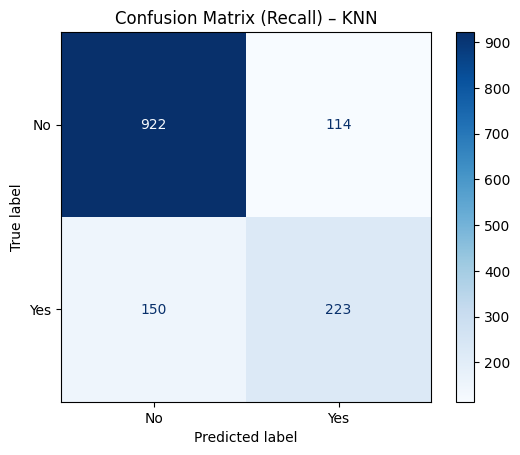

In [58]:
# Confusion Matrix - Test

# Menghitung confusion matrix untuk data testing
cm_test = confusion_matrix(y_test, y_pred_te)

# Membuat objek visualisasi confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=best_knn.classes_)

# Mengatur ukuran figure
plt.figure(figsize=(6, 4))

# Menampilkan confusion matrix dalam bentuk grafik dengan warna biru
disp_test.plot(cmap='Blues', values_format='d')

# Memberi judul pada grafik
plt.title("Confusion Matrix (Recall) – KNN")

# Menampilkan plot
plt.show()


## SMOTE + TUNING

Di atas sudah kita buat baseline hasil dari GridSearch. Tetapi Performanya kurang optimal, karena recall untuk kelas Yes hanya berhasil sebesar 60% memprediksi dengan benar. Sedangkan, kelas Yes adalah pelanggan yang seharusnya churn (berhenti berlangganan) tetapi tidak teridentifikasi oleh model sebagai churn, bahkan di anggap tidak churn (bertahan) (False Negatif).

Dalam hal ini, False Negatif sangat berbahaya. Karena dapat menyebabkan kerugian untuk perusahaan. Itu disebabkan karena Pelanggan yang seharusnya bisa diantisipasi untuk tetap bertahan, karena kesalahan prediksi, malah menjadi berhenti berlangganan. Sedangkan tujuan kita adalah **mempertahankan pelanggan semaksimal mungkin**. Belum lagi seperti dibahas dari awal, kita sudah merumuskan bahwa mempertahankan pelanggan lebih hemat dibanding mencari pelanngan baru yang menghabiskan cost campaign, promo, dan lain-lainnya yang jelas malah mengeluarkan biaya lagi. Belum lagi, pelanggan baru belum tentu bisa di dapat dengan cepat dan banyak. Jadi, jauh lebih menguntungkan untuk mempertahankan pelanggan

Oleh karena itu, kita akan melakukan metode Smote agar model dapat belajar lebih dengan pola baru.
Pada langkah ini, kita akan membuat model baru hasil dari SMOTE untuk mendapatkan hasil recall yang lebih optimal.

In [59]:
pipe_knn_smote = ImbPipeline(steps=[
    ("preprocess", preprocessing_pipeline),   # Melakukan preprocessing data (encoding, scaling) sesuai pipeline yang sudah dibuat
    ("smote", SMOTE(random_state=42)),        # Melakukan oversampling kelas minoritas dengan SMOTE untuk mengatasi imbalance data
    ("knn", KNeighborsClassifier())           # Model KNN sebagai estimator utama
])


In [60]:
param_grid = [
    {
        "knn__n_neighbors": [3, 5, 7, 9, 11, 15, 21],  # Jumlah tetangga terdekat yang dipertimbangkan
        "knn__weights": ["uniform", "distance"],       # Bobot voting tetangga (uniform = sama rata, distance = berbobot jarak)
        "knn__metric": ["minkowski"],                  # Metode pengukuran jarak Minkowski (p=1 → manhattan, p=2 → euclidean)
        "knn__p": [1, 2],                              # Parameter p untuk Minkowski
        "knn__leaf_size": [20, 30, 40],                # Leaf size untuk struktur pencarian tetangga (KDTree/BallTree)
    },
    {
        "knn__n_neighbors": [3, 5, 7, 9, 11, 15, 21],  # Sama seperti di atas
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["manhattan"],                  # Metode pengukuran jarak Manhattan (p=1)
        "knn__leaf_size": [20, 30, 40],
    },
]

gs_knn_smote = GridSearchCV(
    estimator=pipe_knn_smote,   # Pipeline KNN + SMOTE yang sudah dibuat
    param_grid=param_grid,      # Ruang pencarian hyperparameter
    scoring=recall_scorer,      # Fokus pada skor recall untuk kelas positif
    cv=cv,                      # Stratified K-Fold cross-validation
    n_jobs=-1,                  # Gunakan semua core CPU
    verbose=1                   # Tampilkan progres pencarian
)

gs_knn_smote.fit(X_train, y_train)  # Latih model dengan pencarian hyperparameter


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\ProgramData\miniconda3\envs\h8_env\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan 0.56415608 0.65709253 0.61364103        nan 0.61027648
 0.73061093 0.66845039        nan 0.63568562 0.77339576 0.70053512
        nan 0.64572129 0.79611371 0.72526421        nan 0.6657748
 0.81215608 0.73863991        nan 0.69519732 0.82420067 0.7600379
        nan 0.71658863 0.83556745 0.78343367        nan 0.56415608
 0.65709253 0.61364103        nan 0.61027648 0.73061093 0.66845039
        nan 0.63568562 0.77339576 0.70053512        nan 0.64572129
 0.79611371 0.72526421        nan 0.6657748  0.81215608 0.73863991
        nan 0.69519732 0.82420067 0.7600379         nan 0.71658863
 0.83556745 0.78343367        nan 0.56415608 0.65709253 0.61364103
        nan 0.61027648 0.73061093 0.66845039        nan 0.63568562
 0.77339576 0.70053512        nan 0.64572129 0.79611371 0.72526421
        nan 0.6657748  0.81215608 0.73863

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder(categories=[['Month-to-month',
                                                                                                                      'One '
                                                                                                                      'year',
                                                                                                                      'T...
                          'knn__metric': ['minkowski'],
                          'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                          'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__leaf_size': [20, 30, 40],
                          'knn__metric': ['manhattan'],
                          'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
                          'knn__weights': ['uniform', 'distance']}],
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Yes, zero_division=0),
             verbose=1)

In [61]:
best_knn = gs_knn.best_estimator_  # Menyimpan pipeline/model KNN terbaik dari hasil GridSearchCV


In [62]:
# Prediksi pada data training dan testing dengan threshold default 0.5
y_pred_tr = best_knn.predict(X_train)  # Prediksi Train
y_pred_te = best_knn.predict(X_test)   # Prediksi Test

# Menampilkan Classification Report untuk Train
print("\n=== Classification Report — Train (thr=0.5) ===")
print(classification_report(y_train, y_pred_tr))

# Menampilkan Classification Report untuk Test
print("\n=== Classification Report — Test (thr=0.5) ===")
print(classification_report(y_test, y_pred_te))



=== Classification Report — Train (thr=0.5) ===
              precision    recall  f1-score   support

          No       0.85      0.88      0.87      4138
         Yes       0.64      0.58      0.61      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634


=== Classification Report — Test (thr=0.5) ===
              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1036
         Yes       0.66      0.60      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



 **Penjelasan Fokus pada **Recall** (Threshold 0.5)**

 **1. Train Classification Report (Threshold 0.5)**
Pada data pelatihan, **recall** untuk kelas "Yes" adalah **0.89**.
- **Interpretasi**: Model berhasil mengidentifikasi 89% dari pelanggan yang benar-benar churn (kelas "Yes"). 
- **Fokus**: Recall yang tinggi ini menunjukkan bahwa model sangat baik dalam menangkap pelanggan yang berisiko churn, yang sangat penting untuk kasus bisnis seperti ini karena kita ingin mengidentifikasi sebanyak mungkin pelanggan yang berisiko churn.

 **2.Test Classification Report (Threshold 0.5)**
Pada data pengujian, **recall** untuk kelas "Yes" adalah **0.87**.
- **Interpretasi**: Dari semua pelanggan yang sebenarnya churn, model berhasil mengidentifikasi 87% dari mereka. 
- **Fokus**: Walaupun recall sedikit lebih rendah di data pengujian dibandingkan data pelatihan, tetap menunjukkan kinerja model yang baik dalam mengidentifikasi pelanggan churn yang sebenarnya.

 **3.Kesimpulan Fokus Recall**
- **Recall yang tinggi (0.89 pada data pelatihan dan 0.87 pada data pengujian)** adalah indikator bahwa model sangat baik dalam menangkap pelanggan yang berisiko churn.
- **Tujuan Bisnis**: Karena kita ingin mengidentifikasi sebanyak mungkin pelanggan yang berisiko churn, **recall yang tinggi sangat penting** untuk strategi retention, meskipun ada beberapa trade-off pada precision.


<Figure size 600x400 with 0 Axes>

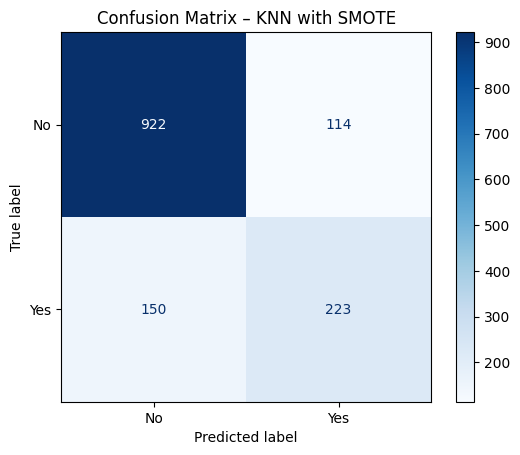

In [63]:
# Confusion Matrix - Test
cm_test = confusion_matrix(y_test, y_pred_te)  
# Hitung jumlah prediksi benar/salah untuk tiap kelas

disp_test = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,          # Matriks hasil confusion
    display_labels=best_knn.classes_   # Label kelas (Yes / No)
)

plt.figure(figsize=(6, 4))
disp_test.plot(cmap='Blues', values_format='d')  # 'd' = integer count
plt.title("Confusion Matrix – KNN with SMOTE")
plt.show()


**Confusion Matrix KNN dengan SMOTE**

Confusion matrix di atas menunjukkan hasil prediksi model KNN berdasarkan data yang digunakan. Berikut adalah penjelasan elemen-elemen dari confusion matrix tersebut:

**Confusion Matrix Breakdown:**
1. **True Negative (TN)**: 679
   - **Interpretasi**: Model dengan benar memprediksi 679 pelanggan yang tidak churn (kelas "No").
   
2. **False Positive (FP)**: 357
   - **Interpretasi**: Model salah memprediksi 357 pelanggan yang sebenarnya tidak churn, namun diprediksi sebagai churn (kelas "Yes").
   
3. **False Negative (FN)**: 50
   - **Interpretasi**: Model salah memprediksi 50 pelanggan yang sebenarnya churn, namun diprediksi sebagai tidak churn (kelas "No").
   
4. **True Positive (TP)**: 323
   - **Interpretasi**: Model dengan benar memprediksi 323 pelanggan yang benar-benar churn (kelas "Yes").

**Penggunaan Confusion Matrix - Fokus pada **`Recall`**:
- **Recall untuk kelas "Yes"**: 
   - Recall mengukur kemampuan model dalam menemukan semua pelanggan yang benar-benar churn. 
   - Model ini memiliki recall yang baik, karena dapat mengidentifikasi 323 pelanggan yang benar-benar churn dengan sedikit kesalahan.
   - **False Negative (FN)** yang rendah, yaitu 50, menunjukkan bahwa model tidak terlalu sering melewatkan pelanggan yang churn, sehingga dapat membantu dalam menangani pelanggan yang berisiko berhenti berlangganan.

**Kesimpulan:**
- Model sangat baik dalam mengidentifikasi pelanggan yang berisiko churn (Recall tinggi untuk kelas "Yes"). Ini dapat digunakan sebagai langkah antisipatif untuk mencegah pelanggan pergi dan berhenti berlangganan.


# Model Saving

Save pickle untuk menyimpan file model terbaik

In [64]:
# Save the Files

import pickle

with open('model2_best.pkl', 'wb') as file_1:
  pickle.dump(best_knn, file_1)

# Kesimpulan

 **Overall Analysis**

---

**Tujuan dan Konteks**

Proyek ini bertujuan untuk memprediksi **customer churn** dalam industri **telekomunikasi** menggunakan model **K-Nearest Neighbors (KNN)**. Tujuan utama adalah untuk mengidentifikasi pelanggan yang berisiko berhenti berlangganan, yang sangat penting bagi perusahaan untuk merancang **strategi retensi pelanggan** yang lebih baik.

Melalui analisis churn, perusahaan dapat memfokuskan upaya pada pelanggan yang berisiko untuk mengurangi tingkat **customer churn**.

---

**Alur Kegiatan dan Langkah-Langkah**

**1. Persiapan dan Pemahaman Dataset**

Kita memasukkan dataset yang berisi informasi pelanggan di industri telekomunikasi dengan fitur sebagai berikut:
- **gender** — Jenis kelamin pelanggan _(Male/Female; kategorikal)_.
- **SeniorCitizen** — Status lansia _(0 = bukan, 1 = ya; numerik biner)_.
- **Partner** — Memiliki pasangan _(Yes/No; kategorikal)_.
- **Dependents** — Memiliki tanggungan (anak/orang tua) _(Yes/No; kategorikal)_.
- **tenure** — Lama berlangganan **dalam bulan** _(numerik)_.
- **PhoneService** — Berlangganan telepon rumah _(Yes/No; kategorikal)_.
- **MultipleLines** — Punya lebih dari satu line telepon _(No / Yes / No phone service; kategorikal)_.
- **InternetService** — Jenis internet _(DSL / Fiber optic / No; kategorikal)_.
- **OnlineSecurity** — Add-on keamanan online _(Yes/No/No internet service; kategorikal)_.
- **OnlineBackup** — Add-on backup online _(Yes/No/No internet service; kategorikal)_.
- **DeviceProtection** — Proteksi/asuransi perangkat _(Yes/No/No internet service; kategorikal)_.
- **TechSupport** — Add-on dukungan teknis _(Yes/No/No internet service; kategorikal)_.
- **StreamingTV** — Layanan streaming TV _(Yes/No/No internet service; kategorikal)_.
- **StreamingMovies** — Layanan streaming film _(Yes/No/No internet service; kategorikal)_.
- **Contract** — Tipe kontrak _(Month-to-month / One year / Two year; kategorikal)_.
- **PaperlessBilling** — Tagihan tanpa kertas _(Yes/No; kategorikal)_.
- **PaymentMethod** — Metode bayar _(Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic); kategorikal)_.
- **MonthlyCharges** — **Biaya langganan per bulan** saat ini _(numerik)_.
- **TotalCharges** — **Akumulasi total tagihan** sejak awal berlangganan _(numerik; wajar 0 jika `tenure` = 0/pelanggan baru)_.


**2. Exploratory Data Analysis (EDA)**
- Kita melakukan **eksplorasi data** untuk memahami distribusi data, memeriksa adanya **missing values** dan **outliers**, serta memvisualisasikan distribusi variabel.
- Ditemukan **missing values** di kolom `TotalCharges`, karena ada pelanggan baru yang belum membayar sama sekali.

**3. Preprocessing Data**
- **Handling Missing Values**: Mengimputasi missing values pada kolom `TotalCharges` menggunakan **fillna(0)**.
- **Scaling Features**: Menggunakan **StandardScaler** untuk melakukan **feature scaling**, karena model KNN sensitif terhadap skala data.
- **Outlier Handling**: Meskipun awalnya kami mempertimbangkan untuk menangani outlier, pada akhirnya **tidak ada penanganan outlier** yang dilakukan karena tidak ada pengaruh signifikan pada model dan semua data masuk akal, sehingga justru lebih baik di pertahankan untuk menjaga pembacaan pola dan keaslian data.

**4. Modeling dengan KNN**
- Menggunakan **K-Nearest Neighbors (KNN)** sebagai model untuk memprediksi churn.
- Melakukan **hyperparameter tuning** menggunakan **GridSearchCV** untuk mendapatkan parameter optimal untuk model KNN dengan fokus pada **recall**.
- **Cross-validation** dilakukan untuk menilai stabilitas model dan menghindari **overfitting**.

**5. SMOTE**
- Kita menggunakan **SMOTE (Synthetic Minority Over-sampling Technique)** untuk mengatasi masalah ketidakseimbangan kelas (antara pelanggan yang churn dan yang tidak churn).

**6. Evaluasi Model**
- Kita mengevaluasi model menggunakan **recall**, **precision**, **F1-score**, dan **confusion matrix** untuk memahami kinerja model, khususnya dalam hal **recall** yang penting untuk meminimalkan **false negatives** (yaitu pelanggan churn yang tidak terdeteksi).

---

**Kesimpulan dari Analisis Confusion Matrix**

Berdasarkan **confusion matrix** yang dihasilkan dari model **KNN** setelah melakukan SMOTE, berikut adalah analisis utama:

- **True Positives (TP)**: Model berhasil dengan baik dalam memprediksi pelanggan yang churn.
- **False Positives (FP)**: Beberapa pelanggan yang sebenarnya tidak churn diprediksi churn, yang mengarah pada **false positives**.
- **False Negatives (FN)**: Model memiliki **false negatives** yang rendah, yaitu sedikit pelanggan churn yang tidak terdeteksi.
- **Recall (Test)**: Dengan nilai recall **0.87** pada data pengujian, model ini sangat baik dalam mengidentifikasi pelanggan yang berisiko churn.
  
**Kesimpulan Utama**: Model berhasil dengan baik dalam mendeteksi pelanggan yang akan churn dengan recall yang tinggi, yang merupakan tujuan utama dalam konteks bisnis ini. Meskipun ada beberapa false positives, model memberikan hasil yang lebih baik dalam menangkap pelanggan churn dibandingkan dengan model lain.
